In [1]:
%matplotlib inline
from real_fermi_model import * 

In [3]:
ne_lst = np.array([1e+18, 1e+18, 1e+20, 1e+20])
Te_lst = np.array([1, 2, 1, 2])

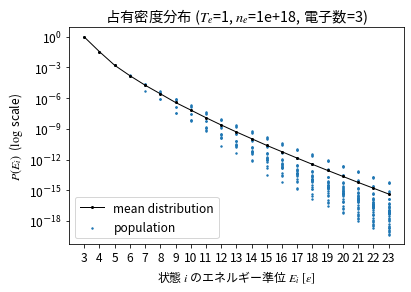

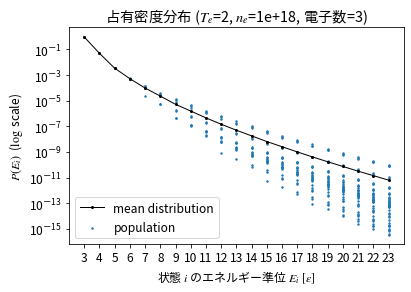

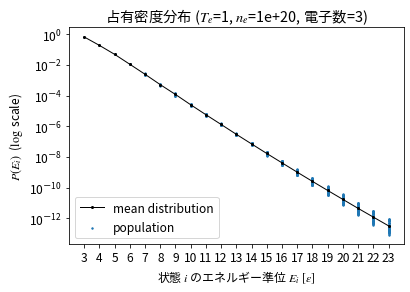

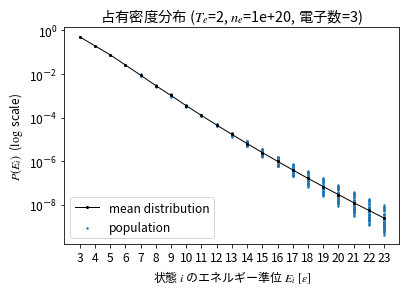

In [3]:
# colabに記載されていたデータ
for ne, Te in zip(ne_lst, Te_lst):
    real_plot_population_and_mean_distribution(ne=ne, Te=Te, e_num=3)

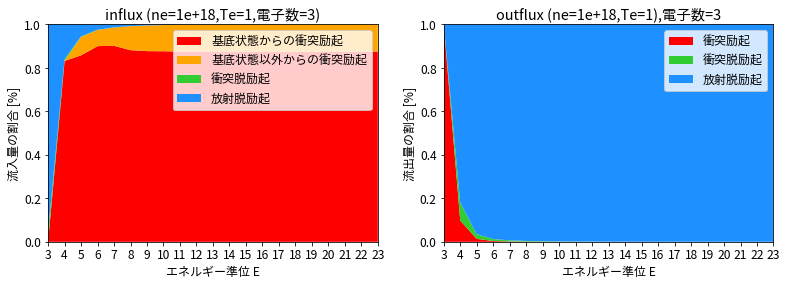

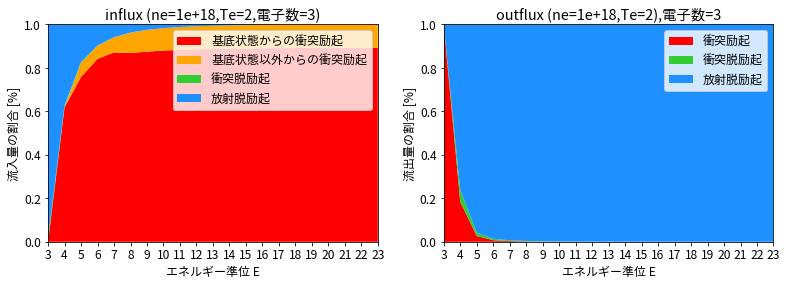

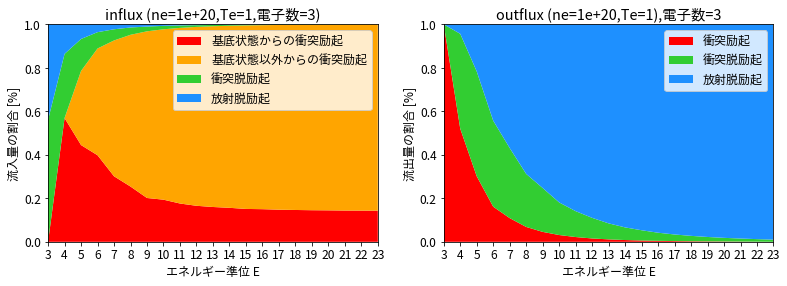

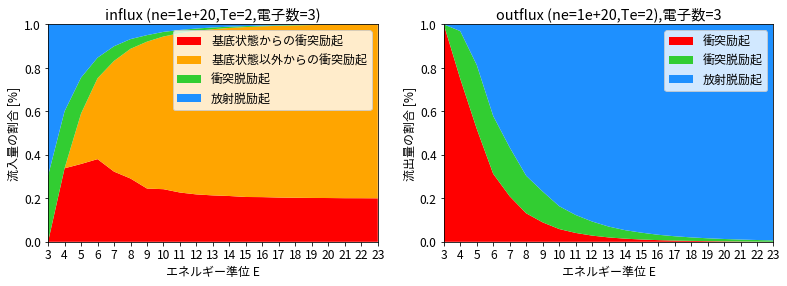

In [3]:
for ne, Te in zip(ne_lst, Te_lst):
    real_plots_percentage_fluxes(ne_lst=[ne], Te=Te, e_num=3)

とりあえず発表では、colabに載っていた、低温プラズマのやつに関して理論モデルを構築したものを掲載し、第一原理計算の結果と比較するとあってるか間違っているかを議論する
この根拠としてはinflux-outfluxのグラフを使用

たぶん高温プラズマ中を考えていくことになる？

scoresはこのままでいいのか？


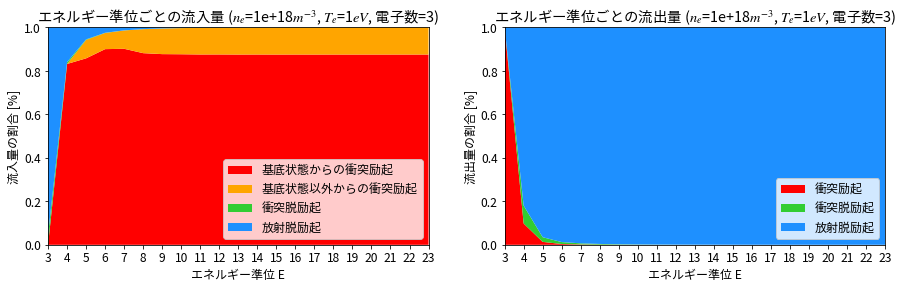

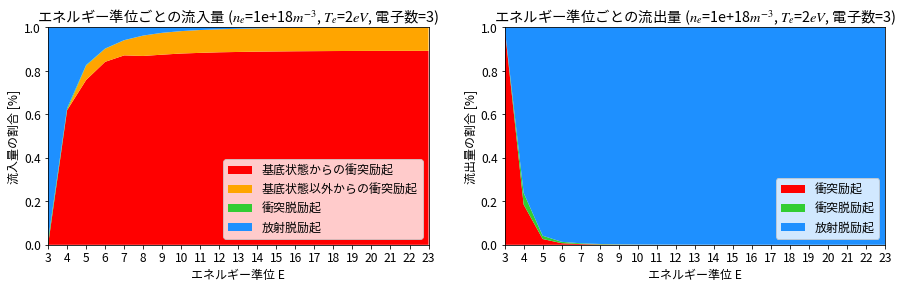

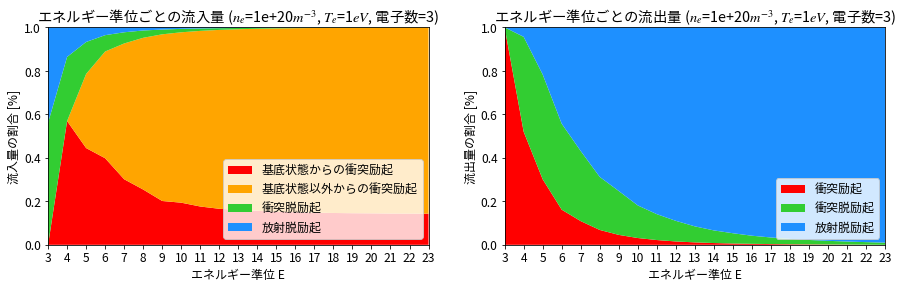

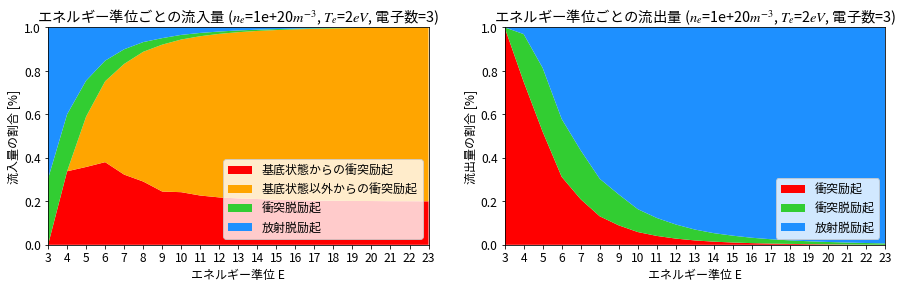

In [3]:
for ne, Te in zip(ne_lst, Te_lst):
    real_plots_percentage_fluxes(ne_lst=[ne], Te=Te, e_num=3)

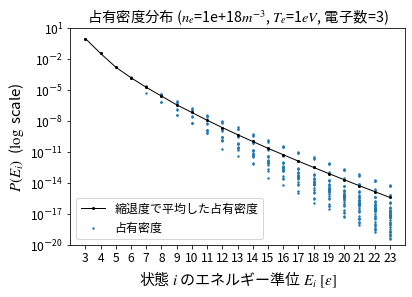

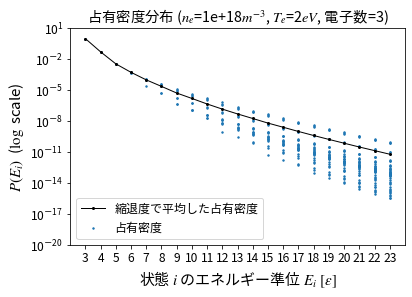

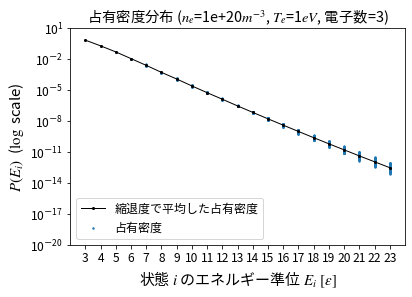

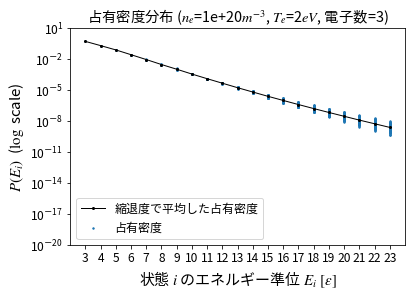

In [4]:
# colabに記載されていたデータ
for ne, Te in zip(ne_lst, Te_lst):
    real_plot_population_and_mean_distribution(ne=ne, Te=Te, e_num=3, ylim=(1e-20, 10))

In [10]:
# scores_eVを自分でテキトーに作る
from approx_util import * 
from real_fermi_model import *

e_num = 10
states = csv_to_states_from_filename(f'states{e_num}.csv')
scores_eV_original = RealFermi.get_scores(states)
Te_eV = Te_lst[0]
ne_eV = ne_lst[0]
mean_approx_dist_eV = calc_approx_mean_dist_eV(scores_eV_original, Te_eV, ne_eV)

In [11]:
mean_approx_dist_eV

array([9.77329193e-01, 1.16038775e-02, 2.98528064e-04, 1.77397816e-05,
       1.52175179e-06, 1.61202864e-07, 1.96174897e-08, 2.63602167e-09,
       3.81784229e-10, 5.86678138e-11, 9.46159332e-12, 1.58892091e-12,
       2.76229354e-13, 4.94892855e-14, 9.10509009e-15, 1.71532378e-15,
       3.30122984e-16, 6.47769558e-17, 1.29377296e-17, 2.62644788e-18,
       5.41271911e-19])

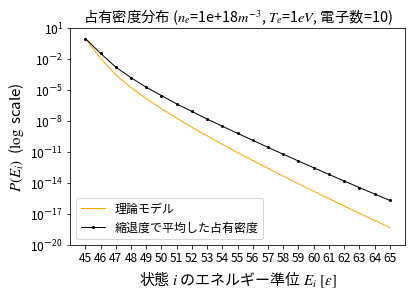

In [12]:

plt.plot(scores_eV_original, mean_approx_dist_eV, label="理論モデル", linewidth=1, color="orange")
fermi = RealFermi(states, Te=Te_eV, ne=ne_eV)
scores, mean_dist = fermi.calc_mean_distribution()
plt.plot(scores, mean_dist, label="縮退度で平均した占有密度", marker=".", linewidth=1, ms=4, color="black")
plt.legend(loc="lower left")
plt.title(fr"占有密度分布 ($n_e$={ne_eV}" + r"$m^{-3}$" + f", $T_e$={Te_eV}$eV$, 電子数={e_num})")
plt.yscale("log")
plt.ylim((1e-20, 10))
plt.xlabel(r"状態 $i$ のエネルギー準位 $E_i$ $[\epsilon]$", fontsize=15)
plt.ylabel(r"$P(E_i)$  ($\log$ scale)", fontsize=15)
scores_ordered_set = sorted([*set(scores)])
plt.xticks(scores_ordered_set)
plt.show()